# Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import scienceplots
scienceplots.stylesheets
plt.style.use('science')

from result import *

2024-11-13 16:51:06.657429: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 16:51:06.668578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731487866.680723 1496106 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731487866.684072 1496106 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 16:51:06.696926: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Centralized Logs

In [2]:
result_list = []
for model_type in ['fbccnn', 'ccnn', 'vit', 'simplevit']:
    for seed in range(1, 6):
        path = f"centralized_logs/{model_type}/seed_{seed}"
        test_acc = print_pickle(f"{path}/test_accuracy_list.pkl")
        train_acc = read_tfevents_file(f"{path}/version_0", "train_accuracy")
        train_acc = train_acc[-1] if train_acc is not None else None
        val_acc = read_tfevents_file(f"{path}/version_0", "val_accuracy")
        val_acc = val_acc[-1] if val_acc is not None else None
        
        if not(train_acc is None or val_acc is None or test_acc is None):
            data = {
                'model_type': model_type,
                'seed': seed,
                'train_acc': train_acc,
                'val_acc': val_acc,
                'test_acc_overall': float(test_acc[3]),
                'test_acc_deap': float(test_acc[0]),
                'test_acc_seed': float(test_acc[1]),
                'test_acc_dreamer': float(test_acc[2]),
            }
            result_list.append(data)
df = pd.DataFrame(result_list).drop(columns='seed').groupby('model_type').agg(['mean', 'std'])
df = (df.swaplevel(axis=1) * 100).round(2).applymap(lambda x: f"{x:.2f}") + '%'
df['mean'] + ' $\pm$ ' + df['std']

The file at centralized_logs/fbccnn/seed_1/test_accuracy_list.pkl was not found.
No tfevents file found in the specified base path.
No tfevents file found in the specified base path.
The file at centralized_logs/fbccnn/seed_2/test_accuracy_list.pkl was not found.
No tfevents file found in the specified base path.
No tfevents file found in the specified base path.
The file at centralized_logs/fbccnn/seed_3/test_accuracy_list.pkl was not found.
No tfevents file found in the specified base path.
No tfevents file found in the specified base path.
The file at centralized_logs/fbccnn/seed_4/test_accuracy_list.pkl was not found.
No tfevents file found in the specified base path.
No tfevents file found in the specified base path.
The file at centralized_logs/fbccnn/seed_5/test_accuracy_list.pkl was not found.
No tfevents file found in the specified base path.
No tfevents file found in the specified base path.
The file at centralized_logs/ccnn/seed_1/test_accuracy_list.pkl was not found.
No tfe

KeyError: "['seed'] not found in axis"

# Federated: Single Run

In [4]:
# Input
base_path = "multirun/2024-11-12/16-53-12/0/"
metric_type = 'accuracy'  # loss or accuracy

# Configuration
print_config_yaml(base_path)

# Dataframe
history_to_df_summary(base_path, metric_type)

# Visualization
# viz_single_train_val(base_path, metric_type)
# viz_single_test(base_path, metric_type)

{'batch_size': 64,
 'config_fit': {'alpha': 0.25,
                'local_epochs': 1,
                'lr': 1e-05,
                'mode': 'offline',
                'temperature': 2},
 'model_type': 'vit',
 'num_cpus': 8,
 'num_gpus': 1,
 'num_rounds': 50,
 'overlap_percent': 0,
 'seed': 1,
 'test_ratio': 0.2}


/home/wawan/anaconda3/envs/tomy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-13 17:07:21,124	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Last Round: 50


/home/wawan/DL/FL/EEGFL/Tomy/federated-local-distillation-eeg/result.py:136: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_averages_df = df.groupby('round', group_keys=False).apply(weighted_average).reset_index(drop=True)
/home/wawan/DL/FL/EEGFL/Tomy/federated-local-distillation-eeg/result.py:136: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_averages_df = df.groupby('round', group_keys=Fa

subset       train                   val                  test           
type        client     server     client     server     client     server
dataset                                                                  
DEAP     99.426270  58.099365  99.426270  58.508301  99.479167  57.278646
SEED     98.027353  86.684255  98.027353  86.068656  97.986414  60.344493
DREAMER  60.866317  60.866317  60.866317  60.866317  60.650767  60.650767
Overall  86.434875  70.083539  86.434875  69.962937  86.364578  59.556844

# Federated: Multirun

## Checking Config

In [5]:
res = []
for i in range(2):
    path = f"multirun/2024-11-12/16-53-12/{i}"
    d = print_config_yaml(path)
    
    res.append(f"{d['model_type']}_{d['seed']}_{d['config_fit']['mode']}_{d['config_fit']['temperature']}_{d['config_fit']['alpha']}")
res

{'batch_size': 64,
 'config_fit': {'alpha': 0.25,
                'local_epochs': 1,
                'lr': 1e-05,
                'mode': 'offline',
                'temperature': 2},
 'model_type': 'vit',
 'num_cpus': 8,
 'num_gpus': 1,
 'num_rounds': 50,
 'overlap_percent': 0,
 'seed': 1,
 'test_ratio': 0.2}
{'batch_size': 64,
 'config_fit': {'alpha': 0.25,
                'local_epochs': 1,
                'lr': 1e-05,
                'mode': 'offline',
                'temperature': 2},
 'model_type': 'vit',
 'num_cpus': 8,
 'num_gpus': 1,
 'num_rounds': 50,
 'overlap_percent': 0,
 'seed': 2,
 'test_ratio': 0.2}


['vit_1_offline_2_0.25', 'vit_2_offline_2_0.25']

## Server-side model

In [7]:
# selecting best server-side model (version 2, after saving client-side model)

# number of parameters:
# fbccnn: 2,118,230
# ccnn: 6,233,602
# vit: 111,810
# simplevit: 25,698

df = read_multirun('multirun/server_side/', 'accuracy', rnd=30)
df = df.xs('server', level='type', axis=1).reset_index().groupby(['model_type', 'dataset']).agg(['mean', 'std'])
df = df.swaplevel(axis=1).round(2).applymap(lambda x: f"{x:.2f}") + '%'
df = df['mean'] + ' $\pm$ ' + df['std']
df['test'].unstack(level='dataset')

FileNotFoundError: [Errno 2] No such file or directory: 'multirun/server_side/'

Visualization

In [6]:
# Prepare for visualization

df_list = []
for model in ['ccnn', 'fbccnn', 'vit', 'simplevit']:
    for seed in range(1, 6):
        base_path = f"multirun/server_side/{model}_{seed}/"
        df = history_to_df_melted(base_path, 'metrics_distributed_fit', "accuracy")
        df['model_type'] = model
        df['seed'] = seed
        df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)

# Rename columns
combined_df = combined_df.rename(columns={'dataset': 'Dataset', 'subset': 'Subset'})

# Replace values
combined_df['Subset'] = combined_df['Subset'].replace({'train': 'Train', 'val': 'Validation'})
combined_df['model_type'] = combined_df['model_type'].replace({'ccnn': 'CCNN', 'fbccnn': 'FBCCNN', 'vit': 'ViT', 'simplevit': 'SimpleViT'})
combined_df.shape

(9600, 8)

Separate Figures

/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


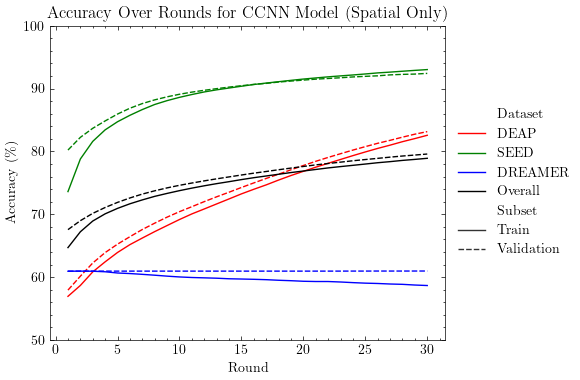

/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


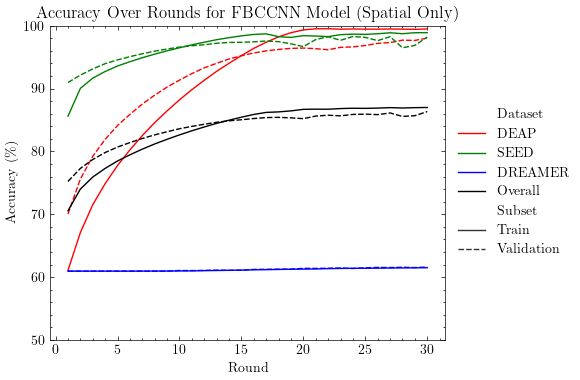

/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


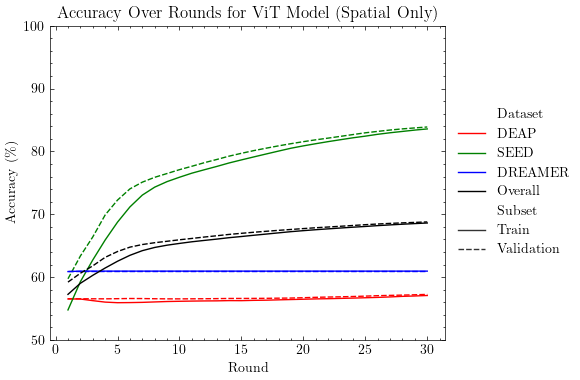

/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


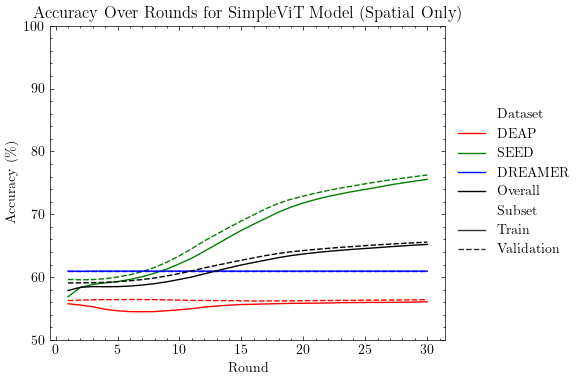

In [7]:
type_input = 'server' # server or client

# Define hue order and colors
hue_order = ['DEAP', 'SEED', 'DREAMER', 'Overall']
hue_colors = ['red', 'green', 'blue', 'black']

# Loop through each model type
for model in ['CCNN', 'FBCCNN', 'ViT', 'SimpleViT']:
    # Filter the dataframe for the current model type
    df_model = combined_df[(combined_df['model_type'] == model) & (combined_df['type'] == type_input)]
    
    # Create the line plot
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=df_model, x="round", y="accuracy", hue="Dataset", style="Subset", errorbar=None, hue_order=hue_order, palette=hue_colors)
    
    # Add titles and labels
    plt.title(f"Accuracy Over Rounds for {model} Model (Spatial Only)")
    plt.xlabel("Round")
    plt.ylabel("Accuracy (\\%)")
    if type_input == 'server':
        plt.ylim(50, 100)
    
    # Move legend outside of the plot
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    # Save the plot
    plt.tight_layout()
    # plt.savefig(f"figures/{type_input}_accuracy_rounds_{model.lower()}.png", dpi=300)
    
    # Display the plot
    plt.show()

One Figure

/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https:

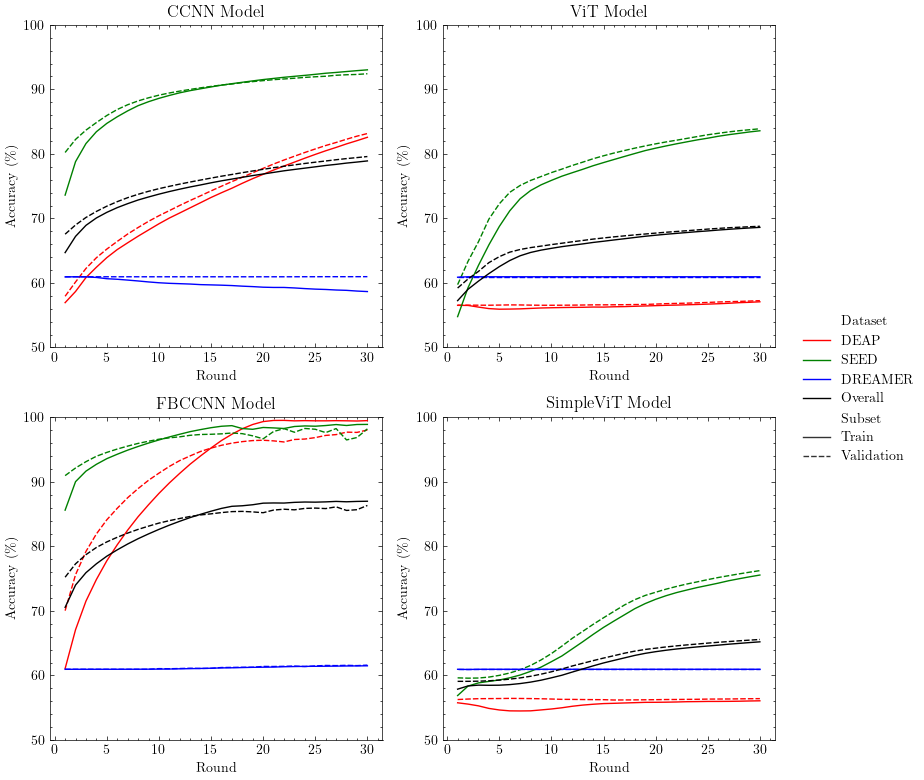

In [8]:
# Define hue order and colors
hue_order = ['DEAP', 'SEED', 'DREAMER', 'Overall']
hue_colors = ['red', 'green', 'blue', 'black']

# List of model types
model_types = ['CCNN', 'ViT', 'FBCCNN', 'SimpleViT']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Loop through each model type and corresponding subplot
for ax, model in zip(axes.flatten(), model_types):
    # Filter the dataframe for the current model type
    df_model = combined_df[(combined_df['model_type'] == model) & (combined_df['type'] == 'server')]
    
    # Create the line plot in the appropriate subplot
    sns.lineplot(data=df_model, x="round", y="accuracy", hue="Dataset", style="Subset", errorbar=None, hue_order=hue_order, palette=hue_colors, ax=ax)
    
    # Add titles and labels
    ax.set_title(f"{model} Model")
    ax.set_xlabel("Round")
    ax.set_ylabel("Accuracy (\\%)")
    ax.set_ylim(50, 100)
    
    # Remove the legend from individual plots
    ax.legend_.remove()

# Add a single legend outside the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust layout to make space for the legend
plt.tight_layout()

# Save the combined plot
# plt.savefig("figures/server_accuracy_rounds_combined.png", dpi=300)

# Display the combined plot
plt.show()

## Distillation Results

In [9]:
# read logs
# paths = ["multirun/2024-07-04/08-55-42/"] # simplevit 1 seed
# paths = ["multirun/rerun/ccnn_1/"] # ccnn 1 seed
paths = ["multirun/updated/ccnn_1/", "multirun/updated/ccnn_2/", "multirun/updated/ccnn_3/", "multirun/updated/ccnn_4/", "multirun/updated/ccnn_5/"]

dfs = [read_multirun(path, "accuracy", rnd=30) for path in paths]
df = pd.concat(dfs)
df.head()

subset                                                                               train  \
type                                                                                client   
model_type seed config_fit.mode config_fit.temperature config_fit.alpha dataset              
ccnn       1.0  offline         1.0                    0.00             DEAP     99.387614   
                                                                        SEED     98.060711   
                                                                        DREAMER  96.419200   
                                                                        Overall  97.914461   
                                                       0.25             DEAP     99.387614   

subset                                                                                      \
type                                                                                server   
model_type seed config_fit.mode config_fit.temperature config_fit.alpha dataset              
ccnn       1.0  offline         1.0                    0.00             DEAP     82.312012   
                                                                        SEED     93.155628   
                                                                        DREAMER  58.921933   
                                                                        Overall  78.968114   
                                                       0.25             DEAP     83.150222   

subset                                                                                 val  \
type                                                                                client   
model_type seed config_fit.mode config_fit.temperature config_fit.alpha dataset              
ccnn       1.0  offline         1.0                    0.00             DEAP     99.387614   
                                                                        SEED     98.060711   
                                                                        DREAMER  96.419200   
                                                                        Overall  97.914461   
                                                       0.25             DEAP     99.387614   

subset                                                                                      \
type                                                                                server   
model_type seed config_fit.mode config_fit.temperature config_fit.alpha dataset              
ccnn       1.0  offline         1.0                    0.00             DEAP     83.186849   
                                                                        SEED     92.453603   
                                                                        DREAMER  60.939208   
                                                                        Overall  79.599953   
                                                       0.25             DEAP     84.048257   

subset                                                                                test  \
type                                                                                client   
model_type seed config_fit.mode config_fit.temperature config_fit.alpha dataset              
ccnn       1.0  offline         1.0                    0.00             DEAP     99.537760   
                                                                        SEED     97.937894   
                                                                        DREAMER  96.028923   
                                                                        Overall  97.784220   
                                                       0.25             DEAP     99.537760   

subset                                                                                      
type                                                                                server  
model_type seed config_fit.mode config_fit.temper

In [10]:
# inspect raw table accuracy
pivot_data = df['test'].reset_index()
pivot_data[(pivot_data['dataset'] == 'Overall')].pivot(
    index=['config_fit.mode', 'config_fit.temperature', 'seed'],
    columns=['config_fit.alpha'],
    values=['client', 'server']
)

client                        \
config_fit.alpha                                  0.00       0.25       0.50   
config_fit.mode config_fit.temperature seed                                    
offline         1.0                    1.0   97.784220  97.784220  97.784220   
                                       2.0   97.948004  97.948004  97.948004   
                                       3.0   97.166739  97.166739  97.166739   
                                       4.0   97.729626  97.729626  97.729626   
                                       5.0   97.821872  97.821872  97.821872   
                2.0                    1.0   97.784220  97.784220  97.784220   
                                       2.0   97.948004  97.948004  97.948004   
                                       3.0   97.166739  97.166739  97.166739   
                                       4.0   97.729626  97.729626  97.729626   
                                       5.0   97.821872  97.821872  97.821872   
                5.0                    1.0   97.784220  97.784220  97.784220   
                                       2.0   97.948004  97.948004  97.948004   
                                       3.0   97.166739  97.166739  97.166739   
                                       4.0   97.729626  97.729626  97.729626   
                                       5.0   97.821872  97.821872  97.821872   
                10.0                   1.0   97.784220  97.784220  97.784220   
                                       2.0   97.948004  97.948004  97.948004   
                                       3.0   97.166739  97.166739  97.166739   
                                       4.0   97.729626  97.729626  97.729626   
                                       5.0   97.821872  97.821872  97.821872   
online          1.0                    1.0   97.895861  97.863212  97.366565   
                                       2.0   97.993257  97.984449  97.689390   
                                       3.0   97.876551  97.813584  97.325361   
                                       4.0   98.004167  98.046693  97.755598   
                                       5.0   97.858318  97.817550  97.317513   
                2.0                    1.0   97.902356  97.905470  97.813225   
                                       2.0   97.998957  98.003275  97.929486   
                                       3.0   97.876292  97.864145  97.771899   
                                       4.0   97.999993  98.065519  97.998059   
                                       5.0   97.861866  97.857831  97.765585   
                5.0                    1.0   97.894010  97.936632  97.913110   
                                       2.0   97.994269  97.980736  97.978700   
                                       3.0   97.879944  97.887005  97.863248   
                                       4.0   98.000081  98.038403  98.044660   
                                       5.0   97.857823  97.890970  97.870180   
                10.0                   1.0   97.902356  97.930892  97.934502   
                                       2.0   97.993257  97.981188  97.988113   
                                       3.0   97.876292  97.863446  97.887826   
                                       4.0   98.004167  98.047395  98.054073   
                                       5.0   97.861866  97.912247  97.886754   

                                                                      server  \
config_fit.alpha                                  0.75       1.00       0.00   
config_fit.mode config_fit.temperature seed                                    
offline         1.0                    1.0   97.784220  97.784220  65.247840   
                                       2.0   97.948004  97.948004  64.829910   
                                       3.0   97.166739  97.166739  69.920367   
                                       4.0   97.729626  97.729626  64.359269   
                                       5.0   97

In [11]:
# pivoting
pivot_data = df['test'].reset_index()
pivot_data = pivot_data[pivot_data['dataset'] == 'Overall']
pivot_data = pivot_data.groupby(['model_type', 'config_fit.mode', 'config_fit.temperature', 'config_fit.alpha']).agg(['mean', 'std'])[['client', 'server']]
pivot_data = pivot_data.unstack(level='config_fit.alpha').swaplevel(1, 2, axis=1).sort_index(axis=1)
pivot_data.round(2)

/tmp/ipykernel_2027781/3335468687.py:4: FutureWarning: ['dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pivot_data = pivot_data.groupby(['model_type', 'config_fit.mode', 'config_fit.temperature', 'config_fit.alpha']).agg(['mean', 'std'])[['client', 'server']]


type                                              client                     \
config_fit.alpha                                    0.00         0.25         
                                                    mean   std   mean   std   
model_type config_fit.mode config_fit.temperature                             
ccnn       offline         1.0                     97.69  0.30  97.69  0.30   
                           2.0                     97.69  0.30  97.69  0.30   
                           5.0                     97.69  0.30  97.69  0.30   
                           10.0                    97.69  0.30  97.69  0.30   
           online          1.0                     97.93  0.07  97.91  0.11   
                           2.0                     97.93  0.07  97.94  0.09   
                           5.0                     97.93  0.07  97.95  0.06   
                           10.0                    97.93  0.07  97.95  0.07   

type                                                                         \
config_fit.alpha                                    0.50         0.75         
                                                    mean   std   mean   std   
model_type config_fit.mode config_fit.temperature                             
ccnn       offline         1.0                     97.69  0.30  97.69  0.30   
                           2.0                     97.69  0.30  97.69  0.30   
                           5.0                     97.69  0.30  97.69  0.30   
                           10.0                    97.69  0.30  97.69  0.30   
           online          1.0                     97.49  0.21  92.93  0.68   
                           2.0                     97.86  0.10  97.38  0.23   
                           5.0                     97.93  0.08  97.88  0.09   
                           10.0                    97.95  0.07  97.93  0.07   

type                                                           server        \
config_fit.alpha                                    1.00         0.00         
                                                    mean   std   mean   std   
model_type config_fit.mode config_fit.temperature                             
ccnn       offline         1.0                     97.69  0.30  66.22  2.25   
                           2.0                     97.69  0.30  66.22  2.25   
                           5.0                     97.69  0.30  66.22  2.25   
                           10.0                    97.69  0.30  66.22  2.25   
           online          1.0                     54.09  2.01  66.22  2.25   
                           2.0                     55.59  0.06  66.22  2.25   
                           5.0                     58.64  3.71  66.22  2.25   
                           10.0                    60.64  5.34  66.22  2.25   

type                                                                         \
config_fit.alpha                                    0.25         0.50         
                                                    mean   std   mean   std   
model_type config_fit.mode config_fit.temperature                             
ccnn       offline         1.0                     66.20  0.31  66.17  0.05   
                           2.0                     66.46  0.41  65.73  0.51   
                           5.0                     66.17  0.05  65.57  0.22   
                           10.0                    66.17  0.55  66.26  0.23   
           online          1.0                     67.67  0.54  68.14  0.99   
                           2.0                     67.32  1.15  67.93  0.68   
                           5.0                     67.53  1.20  67.35  0.88   
                           10.0                    66.88  1.43  67.54  0.86   

type                                                                         
config_fit.alpha                                    0.75         1.00        
                                                

In [12]:
# table for client accuracy
x = pivot_data['client'].swaplevel(axis=1).round(2).applymap(lambda x: f"{x:.2f}") + '%'
x['mean'] + ' $\pm$ ' + x['std']

<>:3: DeprecationWarning: invalid escape sequence \p


config_fit.alpha                                                 0.00  \
model_type config_fit.mode config_fit.temperature                       
ccnn       offline         1.0                     97.69% $\pm$ 0.30%   
                           2.0                     97.69% $\pm$ 0.30%   
                           5.0                     97.69% $\pm$ 0.30%   
                           10.0                    97.69% $\pm$ 0.30%   
           online          1.0                     97.93% $\pm$ 0.07%   
                           2.0                     97.93% $\pm$ 0.07%   
                           5.0                     97.93% $\pm$ 0.07%   
                           10.0                    97.93% $\pm$ 0.07%   

config_fit.alpha                                                 0.25  \
model_type config_fit.mode config_fit.temperature                       
ccnn       offline         1.0                     97.69% $\pm$ 0.30%   
                           2.0                     97.69% $\pm$ 0.30%   
                           5.0                     97.69% $\pm$ 0.30%   
                           10.0                    97.69% $\pm$ 0.30%   
           online          1.0                     97.91% $\pm$ 0.11%   
                           2.0                     97.94% $\pm$ 0.09%   
                           5.0                     97.95% $\pm$ 0.06%   
                           10.0                    97.95% $\pm$ 0.07%   

config_fit.alpha                                                 0.50  \
model_type config_fit.mode config_fit.temperature                       
ccnn       offline         1.0                     97.69% $\pm$ 0.30%   
                           2.0                     97.69% $\pm$ 0.30%   
                           5.0                     97.69% $\pm$ 0.30%   
                           10.0                    97.69% $\pm$ 0.30%   
           online          1.0                     97.49% $\pm$ 0.21%   
                           2.0                     97.86% $\pm$ 0.10%   
                           5.0                     97.93% $\pm$ 0.08%   
                           10.0                    97.95% $\pm$ 0.07%   

config_fit.alpha                                                 0.75  \
model_type config_fit.mode config_fit.temperature                       
ccnn       offline         1.0                     97.69% $\pm$ 0.30%   
                           2.0                     97.69% $\pm$ 0.30%   
                           5.0                     97.69% $\pm$ 0.30%   
                           10.0                    97.69% $\pm$ 0.30%   
           online          1.0                     92.93% $\pm$ 0.68%   
                           2.0                     97.38% $\pm$ 0.23%   
                           5.0                     97.88% $\pm$ 0.09%   
                           10.0                    97.93% $\pm$ 0.07%   

config_fit.alpha                                                 1.00  
model_type config_fit.mode config_fit.temperature                      
ccnn       offline         1.0                     97.69% $\pm$ 0.30%  
                           2.0                     97.69% $\pm$ 0.30%  
                           5.0                     97.69% $\pm$ 0.30%  
                           10.0                    97.69% $\pm$ 0.30%  
           online          1.0                     54.09% $\pm$ 2.01%  
                           2.0                     55.59% $\pm$ 0.06%  
                           5.0                     58.64% $\pm$ 3.71%  
                           10.0                    60.64% $\pm$ 5.34%

In [13]:
# table for server accuracy
x = pivot_data['server'].swaplevel(axis=1).round(2).applymap(lambda x: f"{x:.2f}") + '%'
server = x['mean'] + ' $\pm$ ' + x['std']
server

<>:3: DeprecationWarning: invalid escape sequence \p


config_fit.alpha                                                 0.00  \
model_type config_fit.mode config_fit.temperature                       
ccnn       offline         1.0                     66.22% $\pm$ 2.25%   
                           2.0                     66.22% $\pm$ 2.25%   
                           5.0                     66.22% $\pm$ 2.25%   
                           10.0                    66.22% $\pm$ 2.25%   
           online          1.0                     66.22% $\pm$ 2.25%   
                           2.0                     66.22% $\pm$ 2.25%   
                           5.0                     66.22% $\pm$ 2.25%   
                           10.0                    66.22% $\pm$ 2.25%   

config_fit.alpha                                                 0.25  \
model_type config_fit.mode config_fit.temperature                       
ccnn       offline         1.0                     66.20% $\pm$ 0.31%   
                           2.0                     66.46% $\pm$ 0.41%   
                           5.0                     66.17% $\pm$ 0.05%   
                           10.0                    66.17% $\pm$ 0.55%   
           online          1.0                     67.67% $\pm$ 0.54%   
                           2.0                     67.32% $\pm$ 1.15%   
                           5.0                     67.53% $\pm$ 1.20%   
                           10.0                    66.88% $\pm$ 1.43%   

config_fit.alpha                                                 0.50  \
model_type config_fit.mode config_fit.temperature                       
ccnn       offline         1.0                     66.17% $\pm$ 0.05%   
                           2.0                     65.73% $\pm$ 0.51%   
                           5.0                     65.57% $\pm$ 0.22%   
                           10.0                    66.26% $\pm$ 0.23%   
           online          1.0                     68.14% $\pm$ 0.99%   
                           2.0                     67.93% $\pm$ 0.68%   
                           5.0                     67.35% $\pm$ 0.88%   
                           10.0                    67.54% $\pm$ 0.86%   

config_fit.alpha                                                 0.75  \
model_type config_fit.mode config_fit.temperature                       
ccnn       offline         1.0                     65.96% $\pm$ 0.16%   
                           2.0                     65.06% $\pm$ 0.34%   
                           5.0                     65.20% $\pm$ 1.16%   
                           10.0                    65.71% $\pm$ 0.73%   
           online          1.0                     68.63% $\pm$ 2.07%   
                           2.0                     67.90% $\pm$ 1.13%   
                           5.0                     67.75% $\pm$ 1.28%   
                           10.0                    67.67% $\pm$ 0.76%   

config_fit.alpha                                                 1.00  
model_type config_fit.mode config_fit.temperature                      
ccnn       offline         1.0                     66.23% $\pm$ 0.28%  
                           2.0                     64.99% $\pm$ 1.45%  
                           5.0                     60.72% $\pm$ 0.86%  
                           10.0                    61.26% $\pm$ 0.80%  
           online          1.0                     58.41% $\pm$ 1.19%  
                           2.0                     57.57% $\pm$ 0.04%  
                           5.0                     58.18% $\pm$ 0.81%  
                           10.0                    58.54% $\pm$ 0.63%

In [14]:
# extract highest for each mode (offline, online)
df_max = pivot_data['server'].xs(key='mean', axis=1, level=-1).stack().reset_index(name='server')
idx_max = df_max.groupby('config_fit.mode')['server'].idxmax()
df_max.loc[idx_max]

,model_type,config_fit.mode,config_fit.temperature,config_fit.alpha,server
6,ccnn,offline,2.0,0.25,66.464837
23,ccnn,online,1.0,0.75,68.630986


In [15]:
server.stack().reset_index(name='accuracy').loc[idx_max]

,model_type,config_fit.mode,config_fit.temperature,config_fit.alpha,accuracy
6,ccnn,offline,2.0,0.25,66.46% $\pm$ 0.41%
23,ccnn,online,1.0,0.75,68.63% $\pm$ 2.07%


/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https:

/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https:

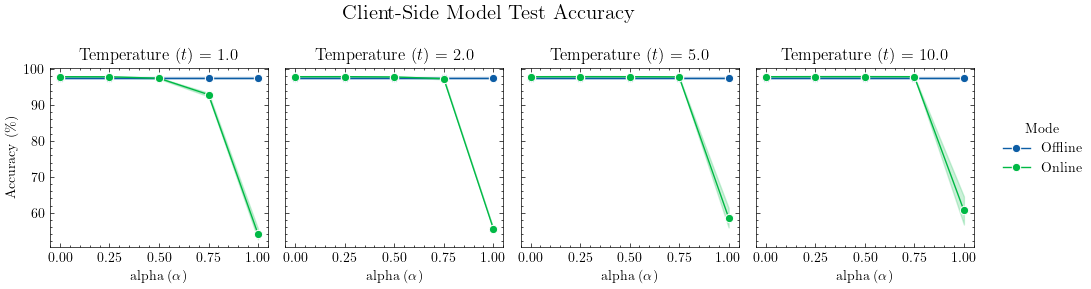

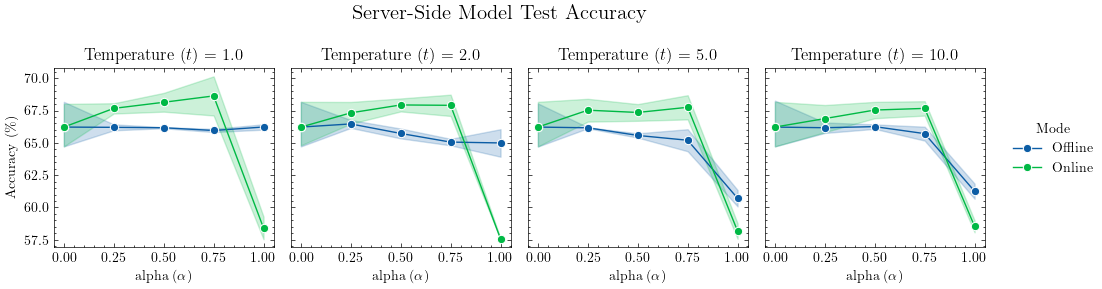

In [16]:
# Visualization
df_viz = df['test'].reset_index()
df_viz = df_viz[df_viz['dataset'] == 'Overall'].drop(columns=['dataset', 'model_type'])
df_viz.rename(columns={'config_fit.alpha': 'Alpha', 'config_fit.temperature': 'Temperature', 'config_fit.mode': 'Mode'}, inplace=True)
df_viz['Mode'] = df_viz['Mode'].replace({'offline': 'Offline', 'online': 'Online'})

for y in ['client', 'server']:
    # Get unique temperatures
    temperatures = df_viz['Temperature'].unique()

    # Create subplots
    fig, axes = plt.subplots(1, len(temperatures), figsize=(10, 3), sharey=True)

    # Loop through each temperature and create a subplot
    for ax, temp in zip(axes, temperatures):
        sns.lineplot(
            data=df_viz[df_viz['Temperature'] == temp],
            x='Alpha',
            y=y,
            hue='Mode',
            marker='o',
            ax=ax
        )
        ax.set_title(f'Temperature ($t$) = {temp}')
        ax.set_xlabel('alpha ($\\alpha$)')
        ax.set_ylabel('Accuracy (\\%)')
        
        # Remove the legend from individual plots
        ax.legend_.remove()

    # Add a single legend outside the plot
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title='Mode', loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Title
    plt.suptitle(f"{y.capitalize()}-Side Model Test Accuracy", size=15)

    # Adjust layout
    plt.tight_layout()
    
    # Save the combined plot
    plt.savefig(f"figures/distillation_result_{y}_accuracy.png", dpi=300)

```
# Perform statistical testing
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_anova = pivot_data['server'].xs(key='mean', level=-1, axis=1).drop(columns=[1]).reset_index().drop(columns='model_type').rename(columns={'config_fit.mode': 'mode', 'config_fit.temperature': 'temperature'}).melt(id_vars=['mode', 'temperature'], value_name='accuracy').rename(columns={'config_fit.alpha': 'alpha'})

# Fit the model
model = ols('accuracy ~ C(mode) + C(alpha) + C(temperature)', data=df_anova).fit()

# Perform three-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=1)

# Convert the ANOVA table to a DataFrame for better formatting
pd.DataFrame(anova_table)
```

# Train-Val Accuracy (Server-Side Model Learning Curve)

- Temporal Only: `federated_construct_2/results.ipynb`

- The following results are for Spatial and Spatial+Temporal

In [17]:
# spatial only
df_1 = []
for seed in range(1, 6):
    base_path = f"multirun/server_side/ccnn_{seed}"
    df = history_to_df_melted(base_path, 'metrics_distributed_fit', "accuracy")
    df['seed'] = seed
    df['Distillation Type'] = 'No distillation\n(Spatial)'
    df_1.append(df)
df_1 = pd.concat(df_1, ignore_index=True)
df_1.head()

,dataset,round,type,accuracy,subset,metric,seed,Distillation Type
0,SEED,1,server,73.975012,train,accuracy,1,No distillation\n(Spatial)
1,SEED,2,server,79.146955,train,accuracy,1,No distillation\n(Spatial)
2,SEED,3,server,82.043001,train,accuracy,1,No distillation\n(Spatial)
3,SEED,4,server,83.917091,train,accuracy,1,No distillation\n(Spatial)
4,SEED,5,server,85.228651,train,accuracy,1,No distillation\n(Spatial)


In [18]:
# best offline distillation
df_2 = []
for seed in range(1, 6):
    mode = 'offline' # online
    temp = 2 # 1 2 5 10
    alpha = 0.25 # 0 0.25 0.5 0.75 1
    base_path = f"multirun/updated/ccnn_{seed}/ccnn_{seed}_{mode}_{temp}_{alpha}"
    df = history_to_df_melted(base_path, 'metrics_distributed_fit', "accuracy")
    df['seed'] = seed
    df['Distillation Type'] = 'Offline distillation\n(Spatial + Temporal)'
    df_2.append(df)
df_2 = pd.concat(df_2, ignore_index=True)
df_2.head()

,dataset,round,type,accuracy,subset,metric,seed,Distillation Type
0,DEAP,1,server,57.923993,train,accuracy,1,Offline distillation\n(Spatial + Temporal)
1,DEAP,2,server,59.589485,train,accuracy,1,Offline distillation\n(Spatial + Temporal)
2,DEAP,3,server,61.804548,train,accuracy,1,Offline distillation\n(Spatial + Temporal)
3,DEAP,4,server,63.493944,train,accuracy,1,Offline distillation\n(Spatial + Temporal)
4,DEAP,5,server,64.871944,train,accuracy,1,Offline distillation\n(Spatial + Temporal)


In [19]:
df_3 = []
for seed in range(1, 6):
    mode = 'online' # online
    temp = 1 # 1 2 5 10
    alpha = 0.75 # 0 0.25 0.5 0.75 1
    base_path = f"multirun/updated/ccnn_{seed}/ccnn_{seed}_{mode}_{temp}_{alpha}"
    df = history_to_df_melted(base_path, 'metrics_distributed_fit', "accuracy")
    df['seed'] = seed
    df['Distillation Type'] = 'Online distillation\n(Spatial + Temporal)'
    df_3.append(df)
df_3 = pd.concat(df_3, ignore_index=True)
df_3.head()

,dataset,round,type,accuracy,subset,metric,seed,Distillation Type
0,DEAP,1,server,59.110514,train,accuracy,1,Online distillation\n(Spatial + Temporal)
1,DEAP,2,server,59.534781,train,accuracy,1,Online distillation\n(Spatial + Temporal)
2,DEAP,3,server,60.706421,train,accuracy,1,Online distillation\n(Spatial + Temporal)
3,DEAP,4,server,62.097938,train,accuracy,1,Online distillation\n(Spatial + Temporal)
4,DEAP,5,server,63.622888,train,accuracy,1,Online distillation\n(Spatial + Temporal)


/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https:

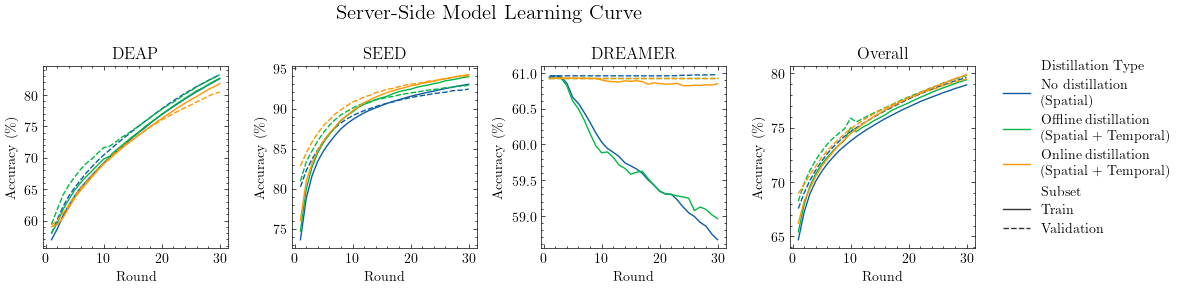

In [20]:
# Visualization
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Convert the 'dataset' column to a categorical type with the specified order
ordered_datasets = ['DEAP', 'SEED', 'DREAMER', 'Overall']
df['dataset'] = pd.Categorical(df['dataset'], categories=ordered_datasets, ordered=True)

# Rename columns
df = df.rename(columns={'subset': 'Subset'})

# Replace values
df['Subset'] = df['Subset'].replace({'train': 'Train', 'val': 'Validation'})
df['Subset'] = pd.Categorical(df['Subset'], categories=['Train', 'Validation'], ordered=True)
df = df.sort_values(['dataset', 'Subset'])

# Filter the DataFrame
df = df[df['type'] == 'server']

# Create the plot
datasets = df['dataset'].unique()
num_datasets = len(datasets)
fig, axes = plt.subplots(1, num_datasets, figsize=(10, 3))

for i, dataset in enumerate(datasets):
    ax = axes[i]
    df_subset = df[df['dataset'] == dataset]
    
    # Plot using seaborn
    sns.lineplot(data=df_subset, x='round', y='accuracy', hue='Distillation Type', style='Subset', errorbar=None, ax=ax,
                 hue_order=['No distillation\n(Spatial)', 'Offline distillation\n(Spatial + Temporal)', 'Online distillation\n(Spatial + Temporal)'])
    
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Round')
    ax.set_ylabel('Accuracy (\\%)')
    
    # Remove the legend from individual plots
    ax.legend_.remove()

# Add a single legend outside the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
# Title
plt.suptitle(f"Server-Side Model Learning Curve", size=15)

plt.tight_layout()
plt.savefig(f"figures/distillation_accuracy_rounds.png", dpi=300)

plt.show()

/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/server-171/anaconda3/envs/eeg-gpu/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https:

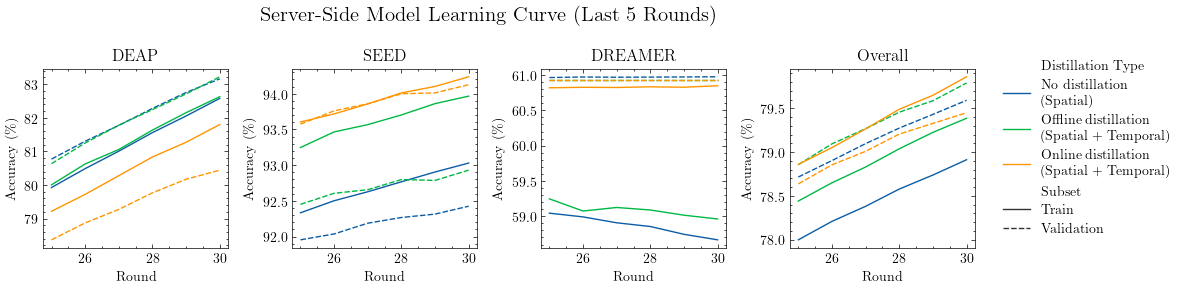

In [21]:
# same as above, but more in detail (only the last 5 rounds)

df = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Convert the 'dataset' column to a categorical type with the specified order
ordered_datasets = ['DEAP', 'SEED', 'DREAMER', 'Overall']
df['dataset'] = pd.Categorical(df['dataset'], categories=ordered_datasets, ordered=True)

# Rename columns
df = df.rename(columns={'subset': 'Subset'})

# Replace values
df['Subset'] = df['Subset'].replace({'train': 'Train', 'val': 'Validation'})
df['Subset'] = pd.Categorical(df['Subset'], categories=['Train', 'Validation'], ordered=True)
df = df.sort_values(['dataset', 'Subset'])

# Filter the DataFrame
df = df[(df['type'] == 'server') & (df['round'] >= 25)]

# Create the plot
datasets = df['dataset'].unique()
num_datasets = len(datasets)
fig, axes = plt.subplots(1, num_datasets, figsize=(10, 3))

for i, dataset in enumerate(datasets):
    ax = axes[i]
    df_subset = df[df['dataset'] == dataset]
    
    # Plot using seaborn
    sns.lineplot(data=df_subset, x='round', y='accuracy', hue='Distillation Type', style='Subset', errorbar=None, ax=ax,
                 hue_order=['No distillation\n(Spatial)', 'Offline distillation\n(Spatial + Temporal)', 'Online distillation\n(Spatial + Temporal)'])
    
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Round')
    ax.set_ylabel('Accuracy (\\%)')
    
    # Remove the legend from individual plots
    ax.legend_.remove()

# Add a single legend outside the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Title
plt.suptitle(f"Server-Side Model Learning Curve (Last 5 Rounds)", size=15)

plt.tight_layout()
plt.savefig(f"figures/distillation_accuracy_rounds_detailed.png", dpi=300)

plt.show()